In [78]:
import pandas as pd
import numpy as np

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns

In [80]:
from pandas import to_datetime

In [81]:
import datetime
from datetime import datetime

In [82]:
raw_csv_data = pd.read_csv("crime_with_coordinates.csv", low_memory=False)

In [83]:
raw_csv_data

,Unnamed: 0,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,...,parent_incident_type,Census Tract 1,Census Block 1,Census Block Group 1,Neighborhood 1,Police District 1,Council District 1,neighborhood,police_dt,council_dt
0,59596,55236827.0,11-0050386,1910-12-22 00:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block CRESTWOOD AV,NaN,BUFFALO,...,Theft,NaN,NaN,NaN,NaN,NaN,NaN,North Park,District D,DELAWARE
1,121509,710086379.0,15-0760407,1914-12-01 22:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,100 Block LINCOLN PW,NaN,BUFFALO,...,Theft,NaN,NaN,NaN,NaN,NaN,NaN,Elmwood Bidwell,District D,DELAWARE
2,204751,942663542.0,06-1840984,1951-07-03 19:51:00,UUV,Buffalo Police are investigating this report o...,NaN,200 Block W FERRY ST,NaN,BUFFALO,...,Theft of Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side,District B,NIAGARA
3,146812,146621859.0,13-0730379,1951-12-05 02:20:21,ASSAULT,Buffalo Police are investigating this report o...,NaN,200 Block CAMBRIDGE AV,NaN,BUFFALO,...,Assault,NaN,NaN,NaN,NaN,NaN,NaN,Genesee-Moselle,District E,MASTEN
4,233717,942606470.0,08-3530528,1952-08-30 16:00:00,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block JEFFERSON AV,NaN,BUFFALO,...,Theft,NaN,NaN,NaN,NaN,NaN,NaN,Broadway Fillmore,District C,ELLICOTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267992,76363,146331068.0,13-0720178,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,1 Block PLYMOUTH AV,NaN,BUFFALO,...,Theft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267993,138740,360846240.0,14-0420506,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,NaN,NaN,Buffalo,...,Theft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267994,145170,57717874.0,11-0400654,NaN,BURGLARY,Buffalo Police are investigating this report o...,NaN,BROADWAY & BAILEY AV,NaN,BUFFALO,...,Breaking & Entering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267995,154055,50578953.0,10-3130893,NaN,ASSAULT,Buffalo Police are investigating this report o...,NaN,200 Block STEVENSON ST,NaN,BUFFALO,...,Assault,NaN,NaN,NaN,NaN,NaN,NaN,Seneca-Cazenovia,District A,SOUTH


## Pre-processing the data

In [84]:
data_police = raw_csv_data.loc[:,['incident_datetime', 'police_dt']]

In [85]:
data_police

,incident_datetime,police_dt
0,1910-12-22 00:00:00,District D
1,1914-12-01 22:00:00,District D
2,1951-07-03 19:51:00,District B
3,1951-12-05 02:20:21,District E
4,1952-08-30 16:00:00,District C
...,...,...
267992,NaN,NaN
267993,NaN,NaN
267994,NaN,NaN
267995,NaN,District A


In [86]:
data_police.incident_datetime = pd.to_datetime(data_police.incident_datetime)

In [87]:
data_police = pd.DataFrame({'no_of_incidents' : data_police.groupby( [ data_police.police_dt, data_police.incident_datetime.dt.date] ).size()}).reset_index()

In [88]:
 data_police

,police_dt,incident_datetime,no_of_incidents
0,District A,1970-08-15,1
1,District A,1981-07-02,1
2,District A,1985-06-19,1
3,District A,1988-10-30,1
4,District A,1992-01-01,1
...,...,...,...
27380,District E,2021-02-15,6
27381,District E,2021-02-16,3
27382,District E,2021-02-17,2
27383,District E,2021-02-18,3


In [89]:
 data_police.isna().sum()

police_dt            0
incident_datetime    0
no_of_incidents      0
dtype: int64

In [90]:
data_A = data_police[data_police['police_dt'] == 'District A']

In [91]:
data_A

,police_dt,incident_datetime,no_of_incidents
0,District A,1970-08-15,1
1,District A,1981-07-02,1
2,District A,1985-06-19,1
3,District A,1988-10-30,1
4,District A,1992-01-01,1
...,...,...,...
5374,District A,2021-02-13,2
5375,District A,2021-02-14,4
5376,District A,2021-02-15,4
5377,District A,2021-02-16,3


In [92]:
data_A = data_A.loc[:,['incident_datetime', 'no_of_incidents']]

In [93]:
data_A

,incident_datetime,no_of_incidents
0,1970-08-15,1
1,1981-07-02,1
2,1985-06-19,1
3,1988-10-30,1
4,1992-01-01,1
...,...,...
5374,2021-02-13,2
5375,2021-02-14,4
5376,2021-02-15,4
5377,2021-02-16,3


In [94]:
data_A.set_index('incident_datetime', inplace = True)

In [95]:
data_A

,no_of_incidents
incident_datetime,
1970-08-15,1
1981-07-02,1
1985-06-19,1
1988-10-30,1
1992-01-01,1
...,...
2021-02-13,2
2021-02-14,4
2021-02-15,4


In [96]:
data_A = data_A.asfreq('D')
data_A.no_of_incidents= data_A.no_of_incidents.fillna(0.0)
data_A

,no_of_incidents
incident_datetime,
1970-08-15,1.0
1970-08-16,0.0
1970-08-17,0.0
1970-08-18,0.0
1970-08-19,0.0
...,...
2021-02-14,4.0
2021-02-15,4.0
2021-02-16,3.0


## Resampling daily data into weekly data

In [97]:
data_A = data_A.resample('W').sum()

In [98]:
data_A

,no_of_incidents
incident_datetime,
1970-08-16,1.0
1970-08-23,0.0
1970-08-30,0.0
1970-09-06,0.0
1970-09-13,0.0
...,...
2021-01-24,16.0
2021-01-31,29.0
2021-02-07,17.0


## Visualizing the data

<AxesSubplot:xlabel='incident_datetime'>

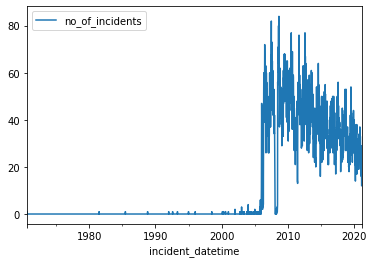

In [99]:
data_A.plot()

In [100]:
data_A = data_A[data_A.index >= '2010-01-01']

In [101]:
data_A

,no_of_incidents
incident_datetime,
2010-01-03,49.0
2010-01-10,52.0
2010-01-17,31.0
2010-01-24,42.0
2010-01-31,41.0
...,...
2021-01-24,16.0
2021-01-31,29.0
2021-02-07,17.0


<AxesSubplot:xlabel='incident_datetime'>

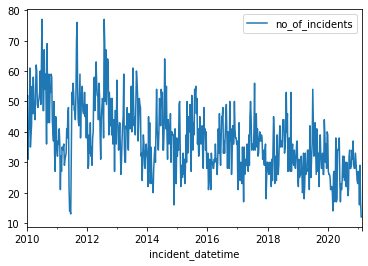

In [102]:
data_A.plot()

### Testing for Stationarity

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
test_result = adfuller(data_A['no_of_incidents'])

In [105]:
#H0: It is non stationary
#H1: It is stationary
def adfuller_test(no_of_incidents):
    result = adfuller(no_of_incidents)
    labels = ['ADF Test Statistic', 'p-value', 'lags used', 'No. of observations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis. Data has a unit root and is non_stationary")

In [106]:
adfuller_test(data_A['no_of_incidents'])

ADF Test Statistic : -3.7972061961138843
p-value : 0.002936028952245108
lags used : 5
No. of observations used : 576
Strong evidence against the null hypothesis. Data has no unit root and is stationary


## Data is Stationary, hence no need for differencing

## Auto ARIMA

In [107]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Splitting the data

In [108]:
data_A_train = data_A[data_A.index < '2021-01-31']
data_A_test = data_A[data_A.index >= '2021-01-31']

In [109]:
data_A_train.shape

(578, 1)

In [110]:
data_A_test.shape

(4, 1)

### Setting index

In [111]:
index = pd.date_range(data_A_train.index[-1], freq = 'W', periods = 4)

In [112]:
index

DatetimeIndex(['2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14'], dtype='datetime64[ns]', freq='W-SUN')

### Running the model

In [113]:
auto_arima_model = pm.auto_arima(data_A_train, seasonal = False, m=0)

In [114]:
forecast = auto_arima_model.predict(4)

In [115]:
forecast = pd.Series(forecast, index = index)

In [116]:
forecast = forecast.rename("Auto Arima")

<AxesSubplot:xlabel='incident_datetime', ylabel='no_of_incidents'>

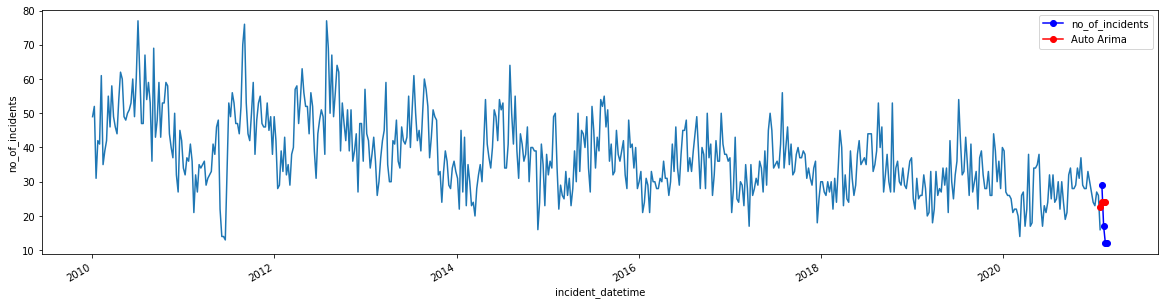

In [117]:
fig, ax = plt.subplots(figsize = (20,5))
chart = sns.lineplot(x='incident_datetime', y='no_of_incidents', data=data_A_train)
data_A_test.plot(ax=ax, color='blue', marker='o', legend=True)
forecast.plot(ax=ax, color='red', marker='o', legend=True)

### MSE of Arima

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
mean_squared_error(data_A_test['no_of_incidents'].values, forecast.values, squared = False)

9.844436211224892